<a href="https://colab.research.google.com/github/wincmoriya/pytorch-handson/blob/main/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
# NNの定義をする様々な関数が用意されている
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# matplotlibのスタイルをggplotに設定
plt.style.use('ggplot')

In [3]:
# 乱数生成
torch.manual_seed(123)

In [7]:
# 傾きa=3, 切片b=2
a = 3
b = 2
# 0から5まで100刻み→viewで100*1という風に変形
x = torch.linspace(0, 5, 100).view(100,1)

In [9]:
# ランダムな変数イプシロンを加える
eps = torch.randn(100, 1)
y = a * x + b + eps

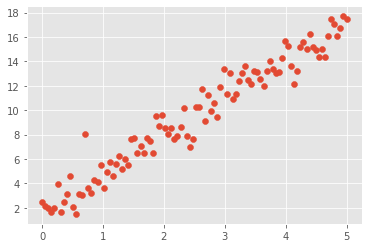

In [10]:
# viewを100*1にした理由→PyTorchで順伝播の計算をするときに必ず入力データの最初にバッチの次元が来る必要がある。
# その次に入力データの次元がある。view(バッチの次元、入力(出力？)データの次元)
# 傾き3で切片2のグラフを描画
plt.scatter(x, y)

## モデルの定義を行う

In [11]:
# Linear Regression 線形回帰なのでLR
# ベースクラスnn.Moduleを継承
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1) # 1つの値を受け取って1つの値を返す
    # 順伝播のモデル定義
    def forward(self, x):
        output = self.linear(x)
        return output

In [12]:
model = LR()

In [14]:
x_test = torch.tensor([[1.0], [2.0]])

In [15]:
model(x_test)

tensor([[-0.4981],
        [-1.2797]], grad_fn=<AddmmBackward>)

In [16]:
# たくさんのデータを与えてみる
x2 = torch.linspace(0, 3, 100).view(100, 1)

In [17]:
x2.size()

torch.Size([100, 1])

In [18]:
y_pred = model(x2)

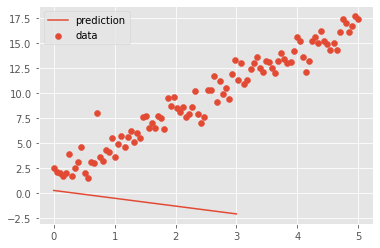

In [22]:
# 描画をするときにy_predを渡すが、順伝播をさせてネットワークが作成されているものなので(Define By Runの性質)
# グラフを描画する際に勾配計算をする設定を取り外す必要がある→detach()勾配計算をしない宣言
plt.plot(x2, y_pred.detach(), label='prediction')
plt.scatter(x, y, label='data')
plt.legend()

In [23]:
# ここから学習させて直線をdataに近似させる
# 損失関数の値を設定する
criterion = nn.MSELoss()
# model.parameters()には重みとバイアスの情報が入っている
# 重みとバイアスを更新したいのでoptimizerに渡す
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [24]:
# 損失関数を保存しておくリストを用意する
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    # 本来はミニバッチの学習をするが今回はデータが小さいのでバッチ学習を行う(そのためミニバッチのループはない)
    # optimizer勾配の初期化を行う
    optimizer.zero_grad()
    # モデルに入力xを与えて予測値を計算
    y_pred = model(x)
    # lossの計算を行う
    loss = criterion(y_pred, y)
    loss.backward()
    # 上記で勾配が求まるのでoptimizerで重みとバイアスを更新する
    optimizer.step()
    # 適当なところでlossの値を吐き出しておく
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))# loss.item()→Tensorから中の値を取り出す
        losses.append(loss.item())


epoch: 0, loss: 158.1025390625
epoch: 10, loss: 109.65031433105469
epoch: 20, loss: 76.15255737304688
epoch: 30, loss: 52.99365234375
epoch: 40, loss: 36.9825325012207
epoch: 50, loss: 25.9130916595459
epoch: 60, loss: 18.26008415222168
epoch: 70, loss: 12.96904182434082
epoch: 80, loss: 9.310954093933105
epoch: 90, loss: 6.781832695007324
epoch: 100, loss: 5.0332112312316895
epoch: 110, loss: 3.824190616607666
epoch: 120, loss: 2.988236665725708
epoch: 130, loss: 2.4102022647857666
epoch: 140, loss: 2.010479688644409
epoch: 150, loss: 1.734033226966858
epoch: 160, loss: 1.542818307876587
epoch: 170, loss: 1.4105280637741089
epoch: 180, loss: 1.3189764022827148
epoch: 190, loss: 1.2555911540985107
epoch: 200, loss: 1.2116785049438477
epoch: 210, loss: 1.1812294721603394
epoch: 220, loss: 1.1600910425186157
epoch: 230, loss: 1.1453883647918701
epoch: 240, loss: 1.135136365890503
epoch: 250, loss: 1.1279627084732056
epoch: 260, loss: 1.1229172945022583
epoch: 270, loss: 1.11934494972229


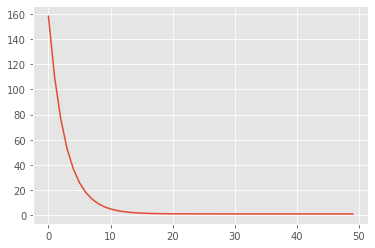

In [26]:
# 損失が150くらいあったのが大体1くらいまで収まっている
# 描画してみる
# 損失の値が下がっている→うまく学習できている
plt.plot(losses)

## テストデータを与えてみる

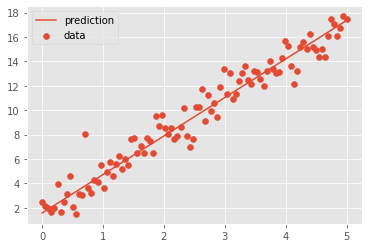

In [28]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()
# 学習がうまくいっていることがわかる